In [11]:
import pytesseract
import cv2
from PIL import Image


In [12]:
image = cv2.imread("data/ID_02.JPG")
base_image = image.copy()


In [13]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


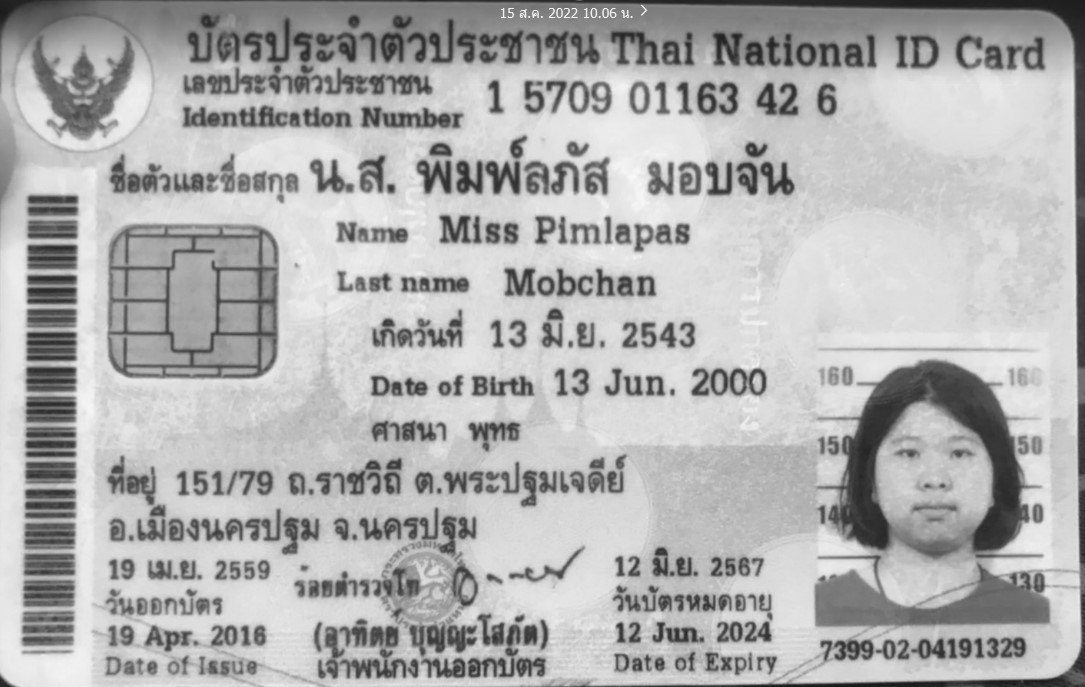

In [14]:
cv2.imwrite("temp/index_gray.png", gray)
img = Image.open("temp/index_gray.png")
display(img)


In [15]:
blur = cv2.GaussianBlur(gray, (7, 7), 0)


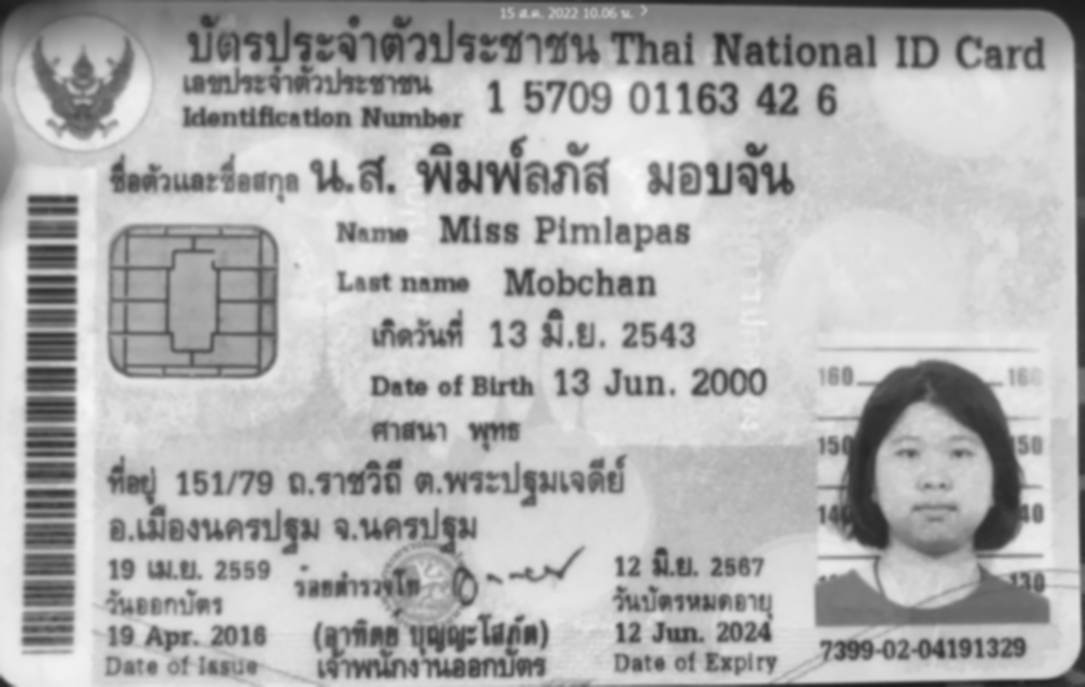

In [16]:
cv2.imwrite("temp/index_blur.png", blur)
img = Image.open("temp/index_blur.png")
display(img)


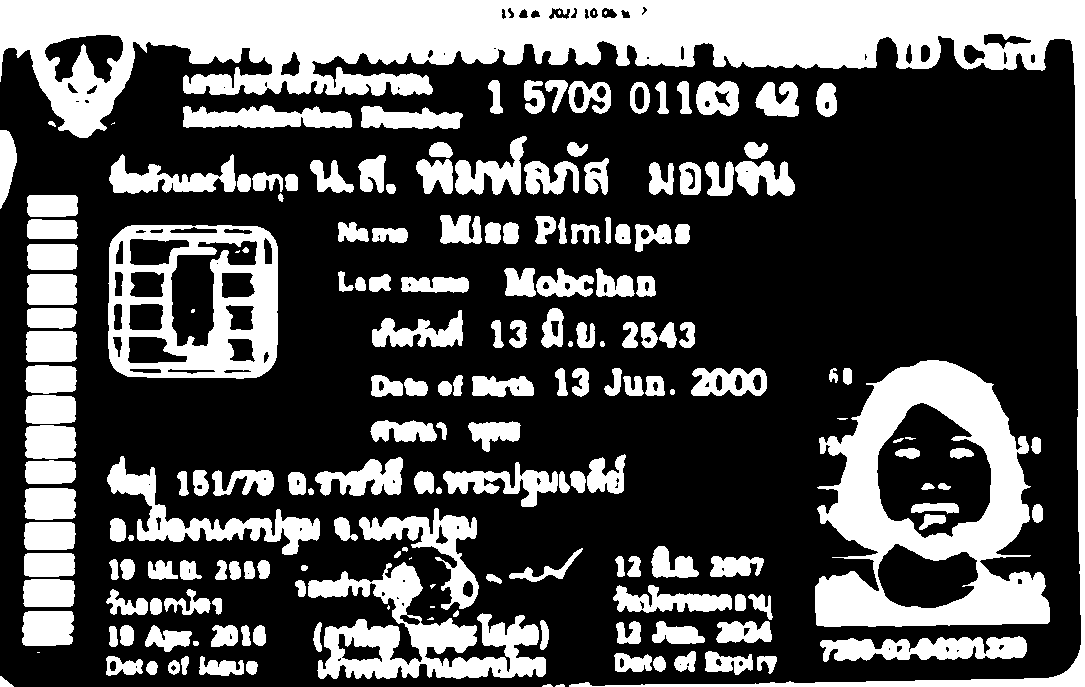

In [17]:
thresh = cv2.threshold(
    blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
cv2.imwrite("temp/index_thresh.png", thresh)
img = Image.open("temp/index_thresh.png")
display(img)


In [18]:
kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 13))
cv2.imwrite("temp/index_kernal.png", kernal)
img = Image.open("temp/index_kernal.png")
display(img)


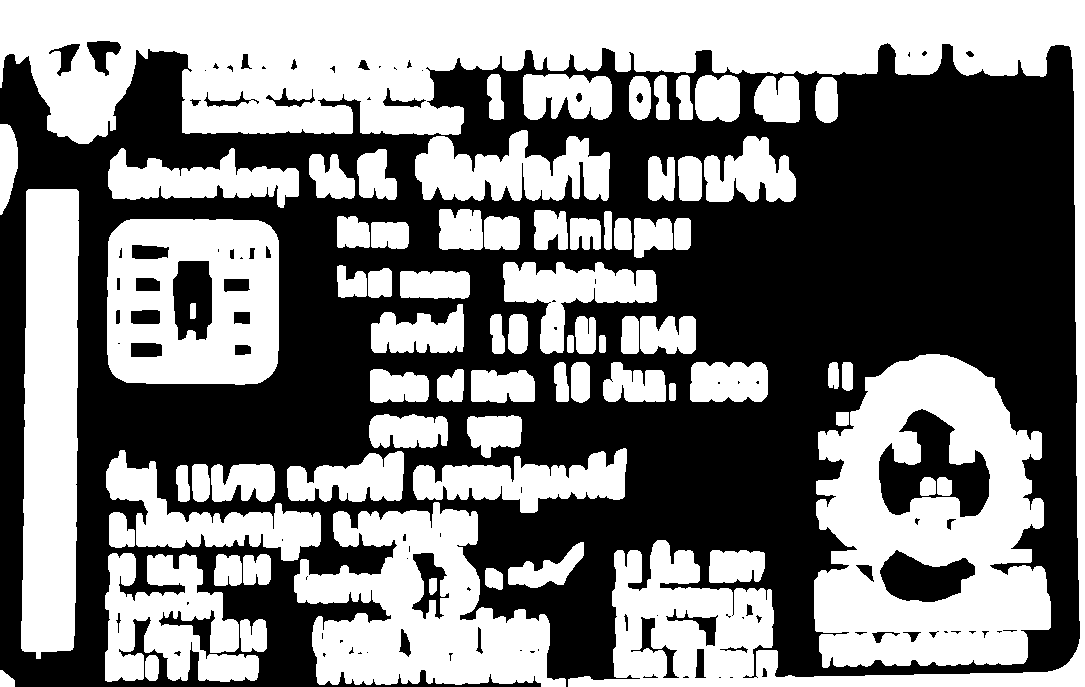

In [19]:
dilate = cv2.dilate(thresh, kernal, iterations=1)
cv2.imwrite("temp/index_dilate.png", dilate)
img = Image.open("temp/index_dilate.png")
display(img)


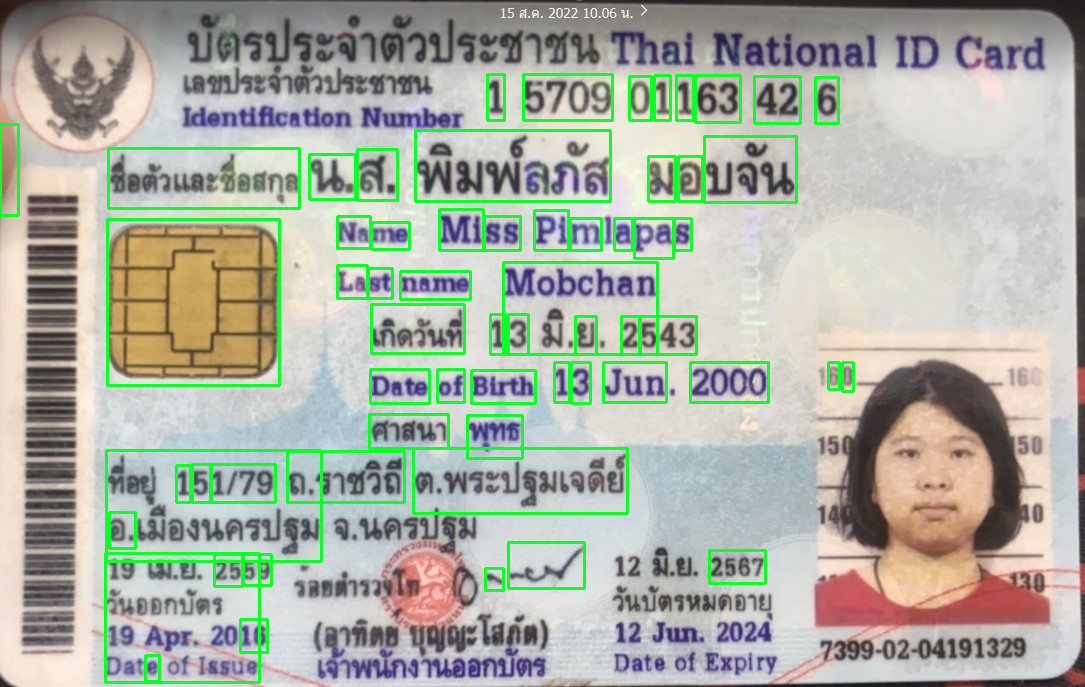

In [20]:
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    if 20 < h<170 and 10 < w < 500:
        roi = image[y:y+h, x:x+h]
        cv2.imwrite("temp/index_roi.png", roi)
        cv2.rectangle(image, (x, y), (x+w, y+h), (36, 255, 12), 2)
cv2.imwrite("temp/index_bbox_new.png", image)
img = Image.open("temp/index_bbox_new.png")
display(img)
